processing test data 0/40
0 0.17768352890576342


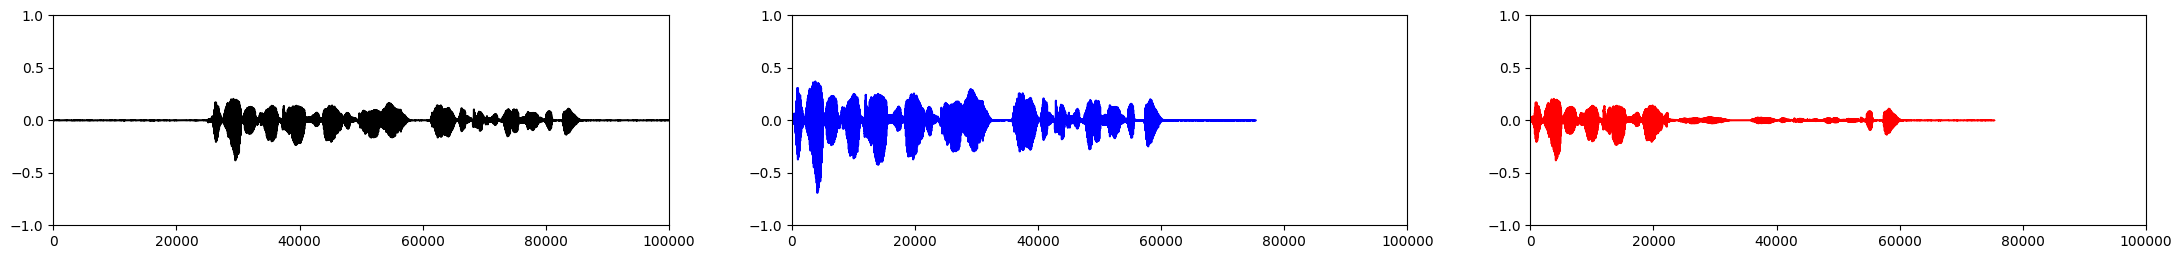

1 6.660615629723861


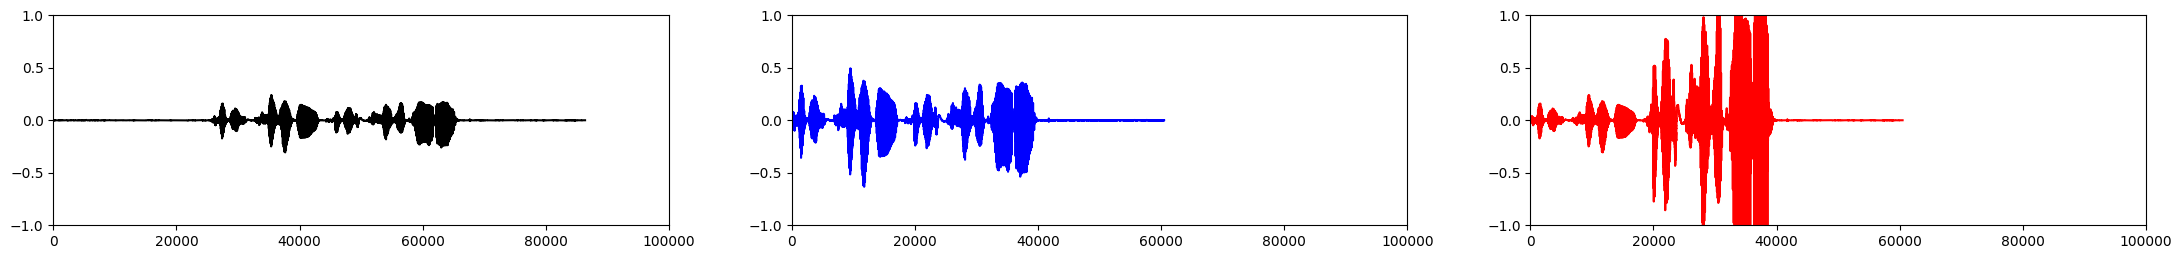

2 0.21687061174858996


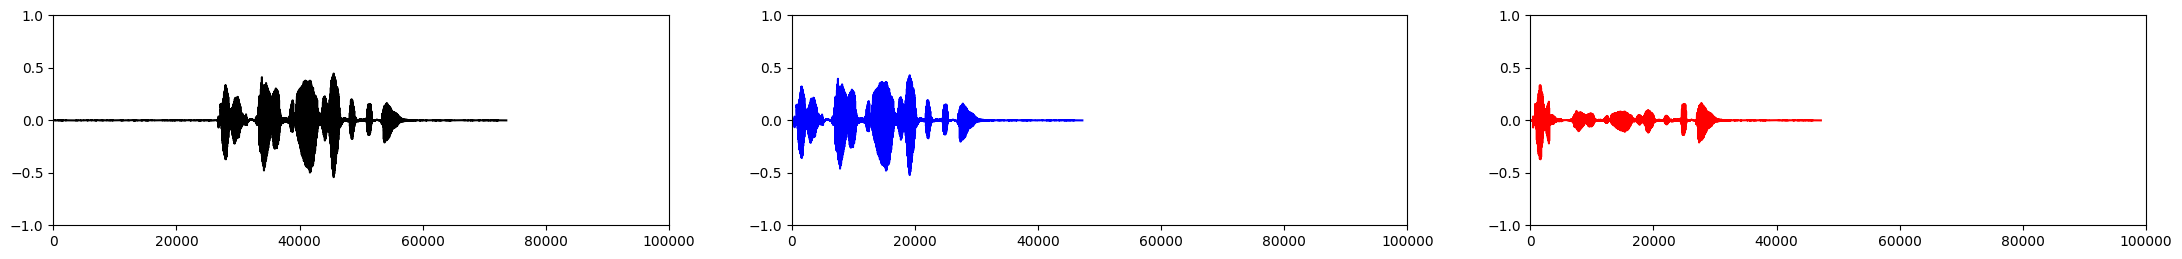

3 4.029853582082812


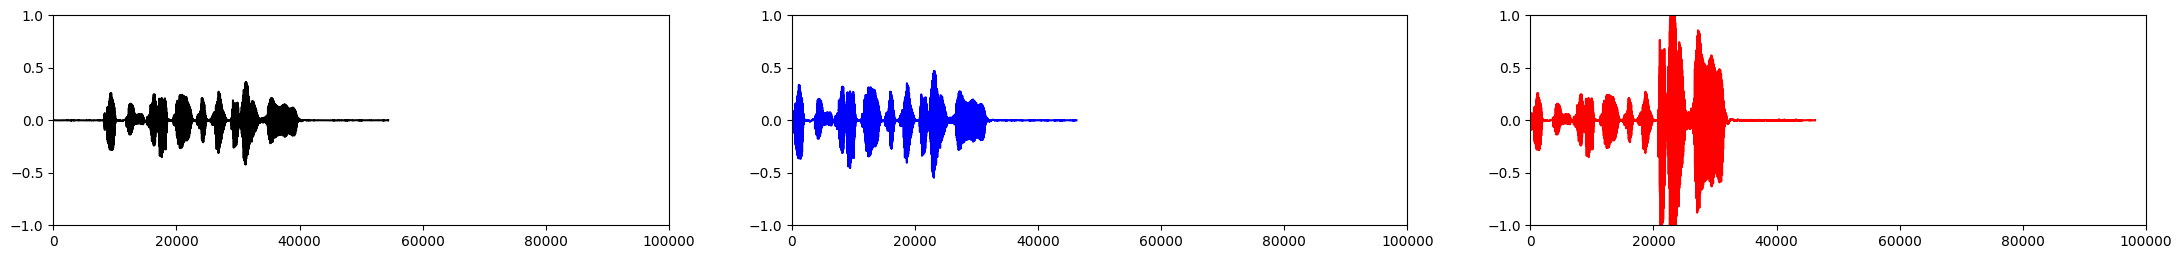

4 0.19230540171807095


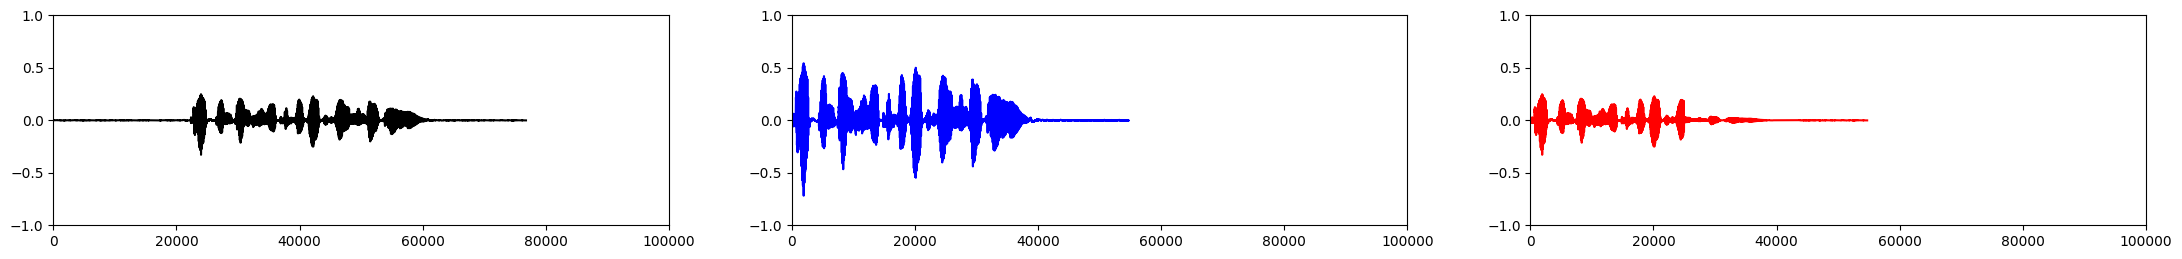

5 4.224178413035901


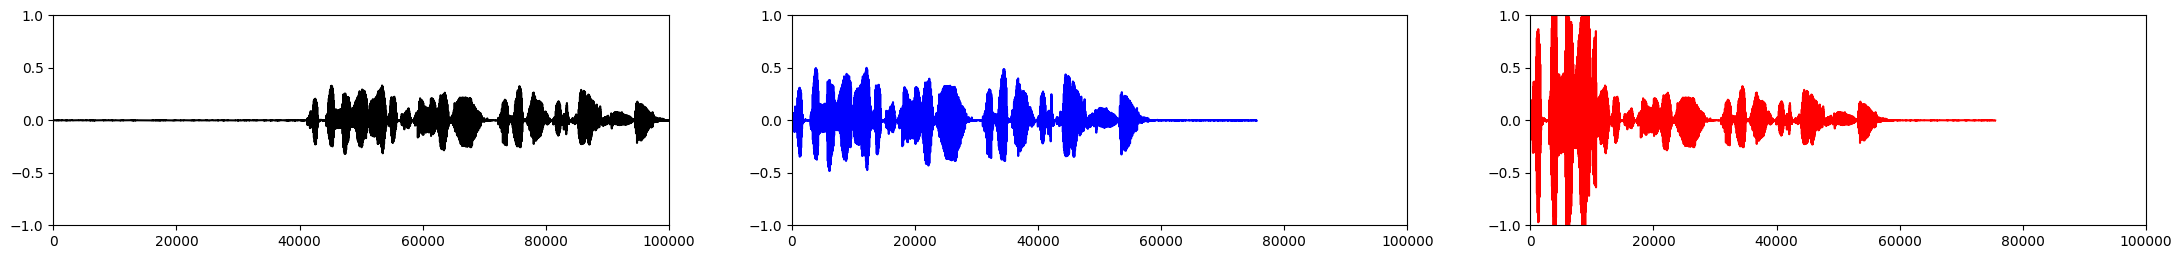

6 0.20322653671726879


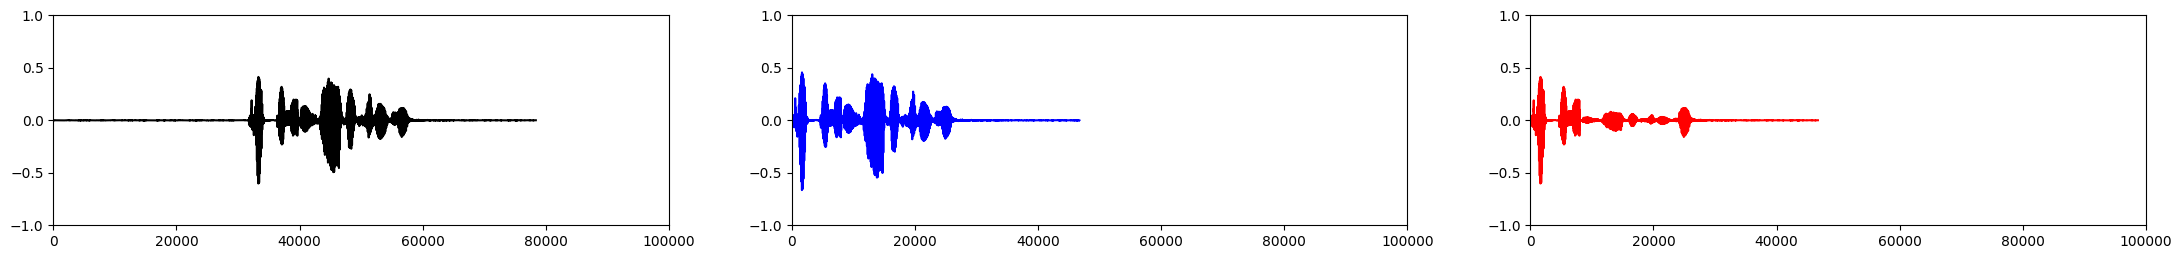

7 6.984140439095057


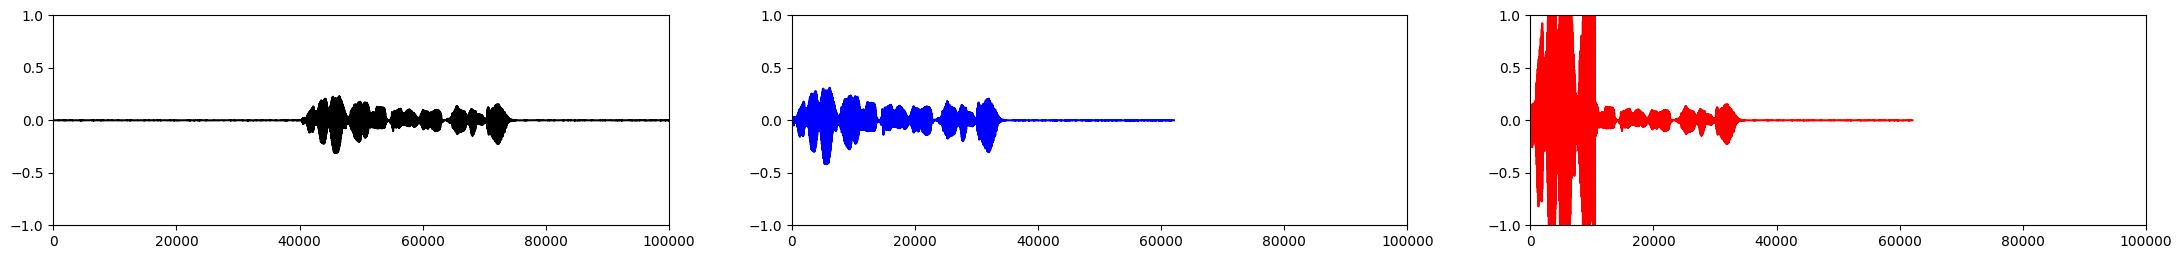

8 0.2208719560908255


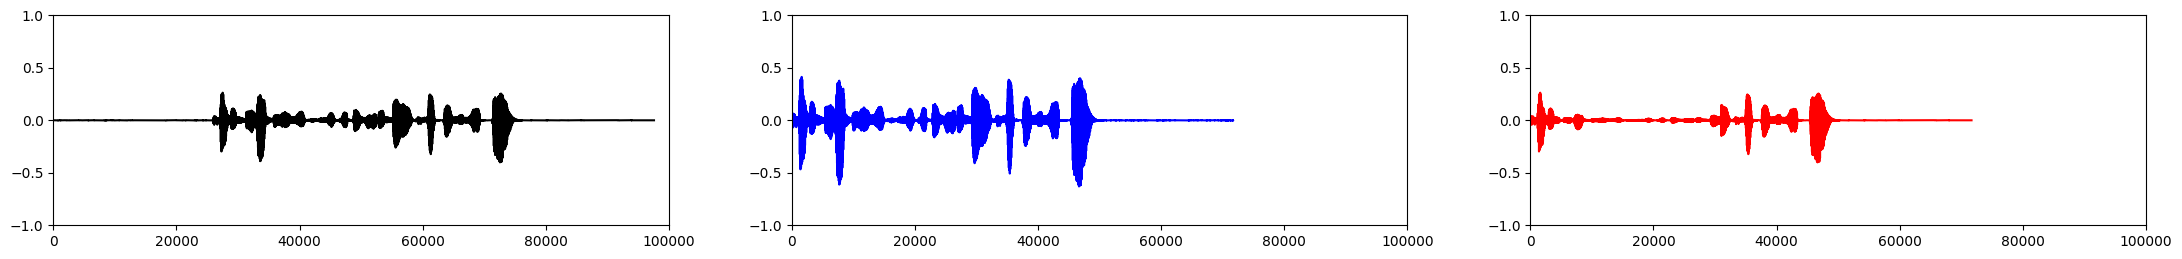

9 5.2149378801355315


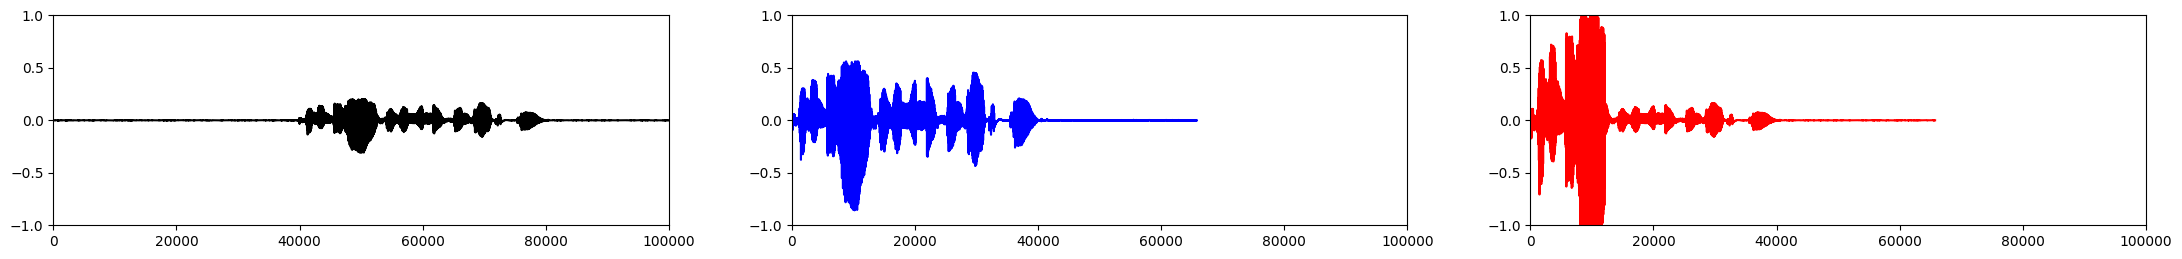

10 0.14143104731876197


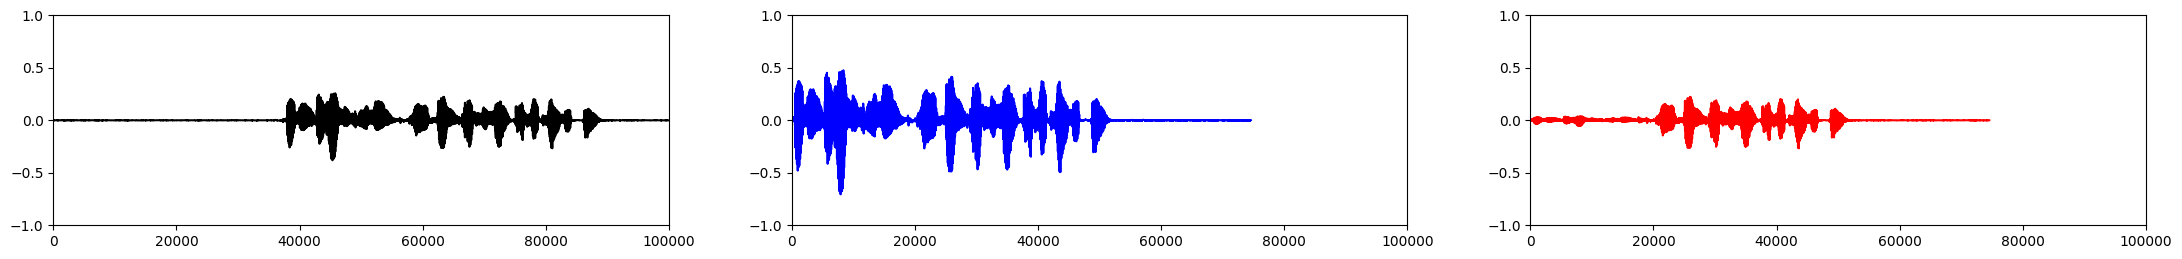

11 4.837749953540793


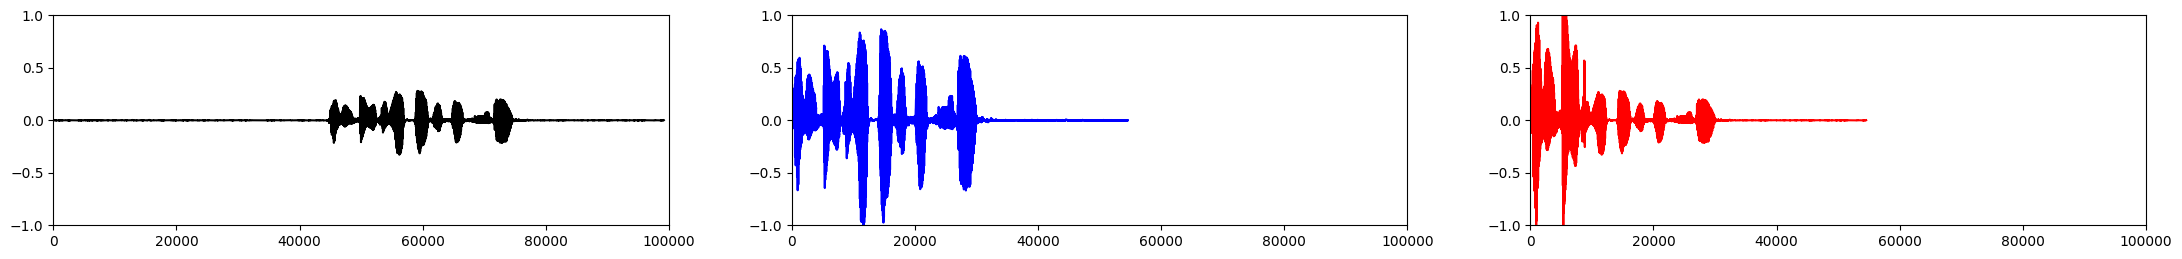

12 0.1878537974162237


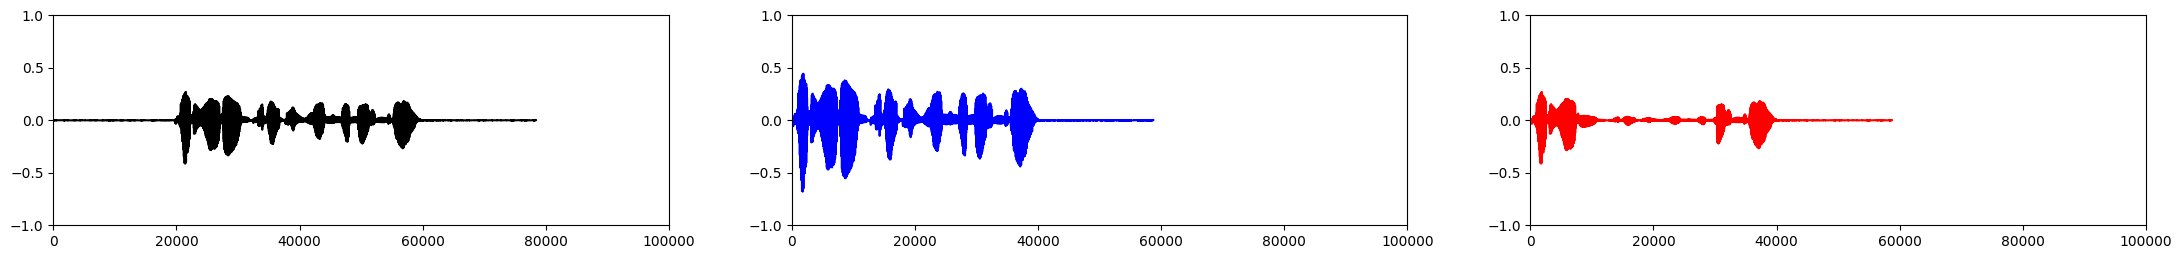

13 5.238258827626813


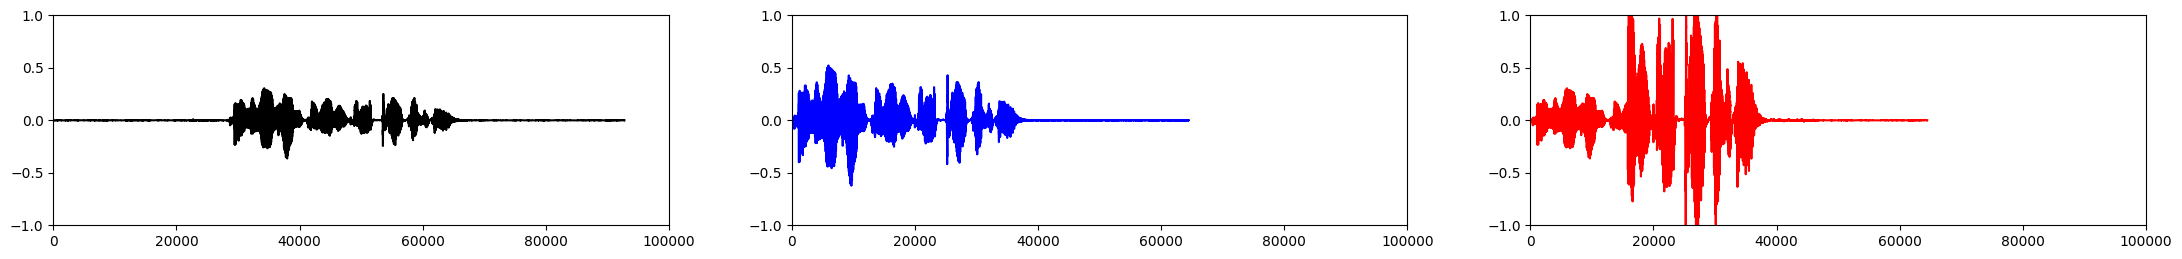

14 0.1558447166340106


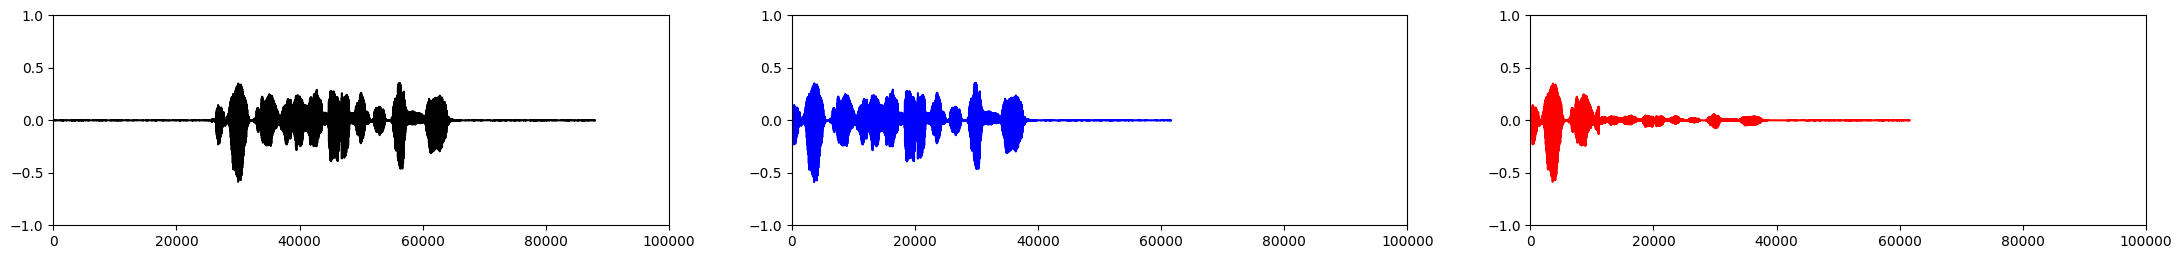

15 5.283749572160464


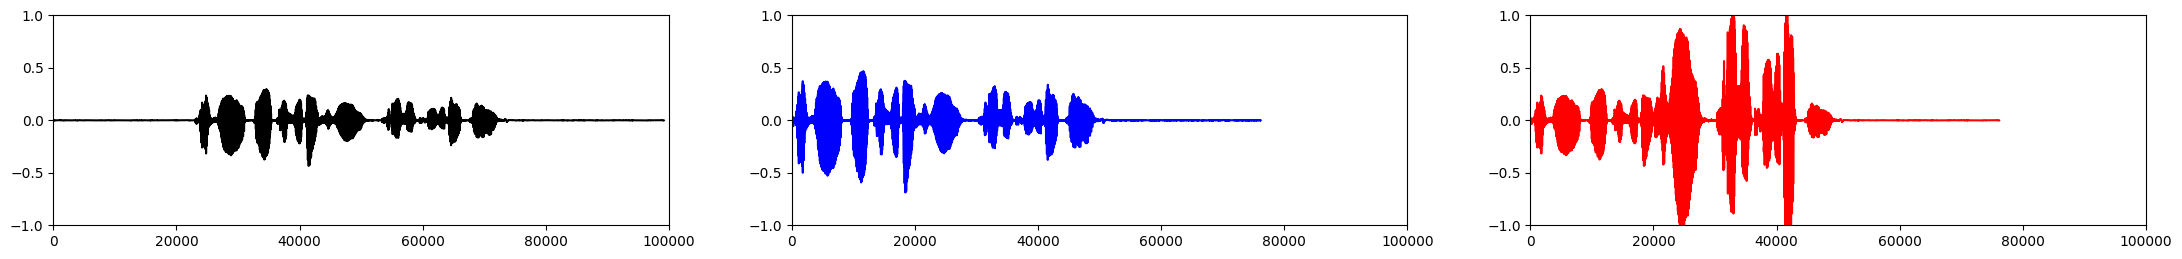

16 0.20325375665860032


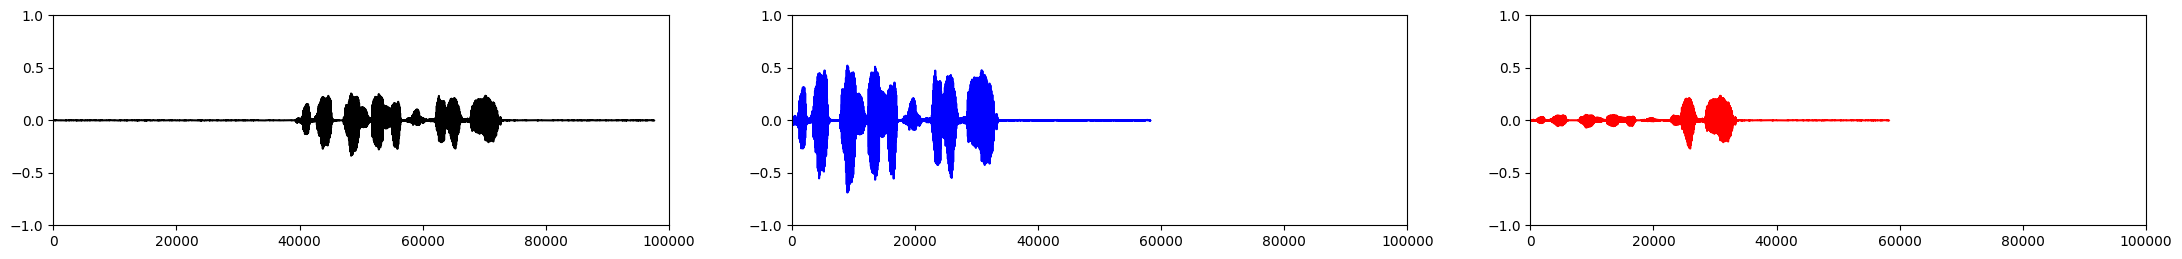

17 5.460220681105158


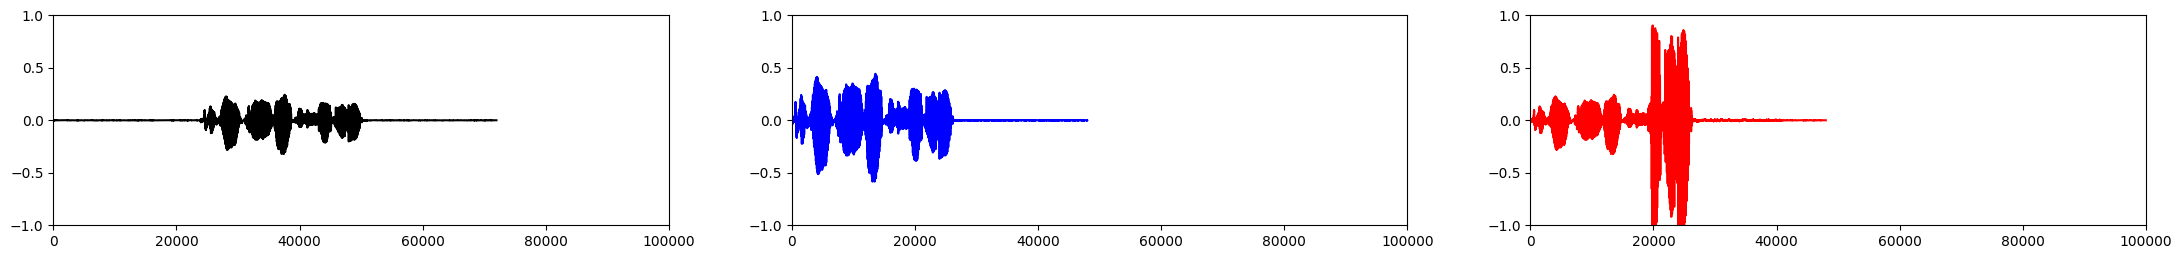

18 0.1393155120696248


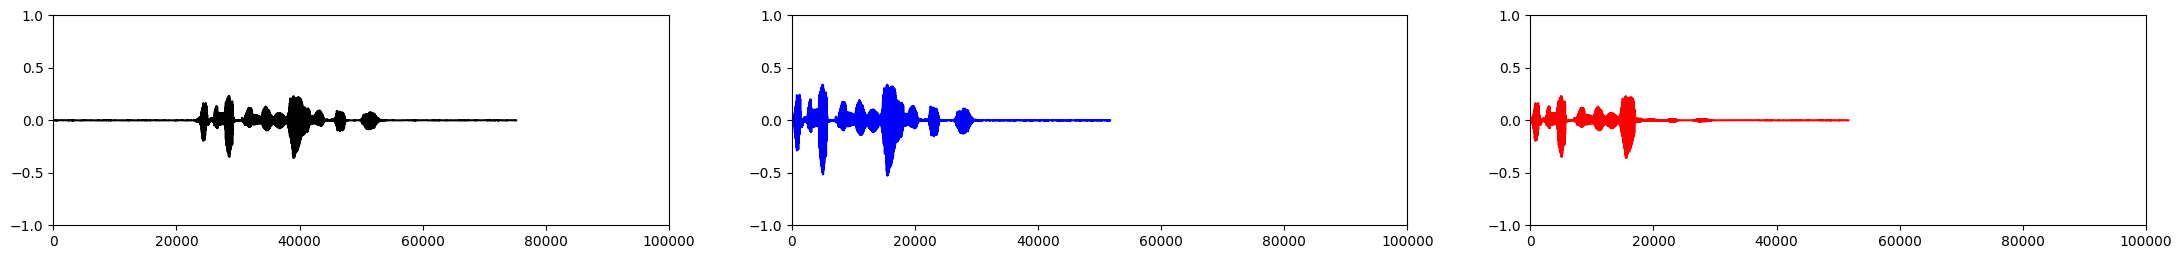

19 6.4222135261669635


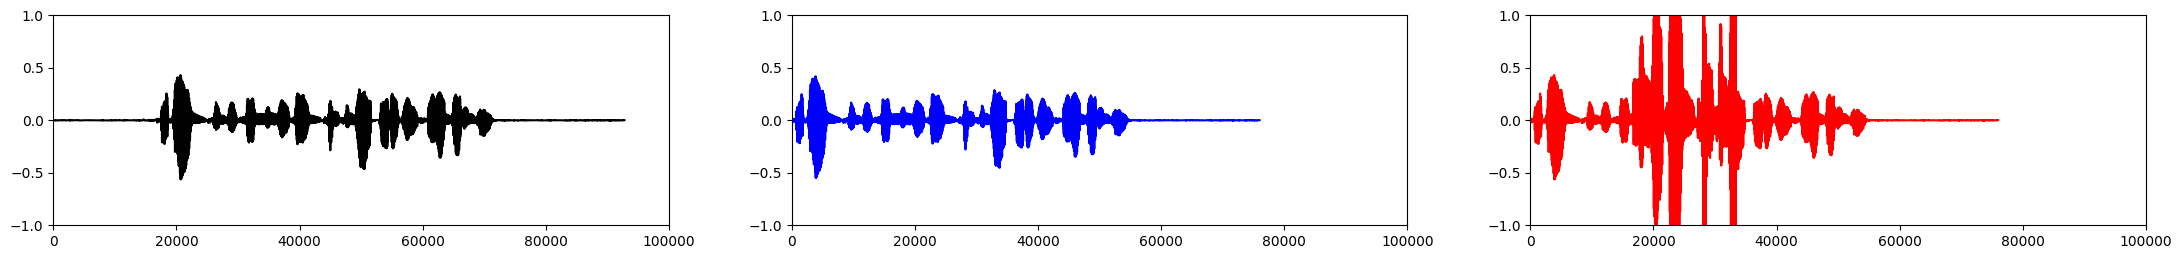

20 0.23655069316580804


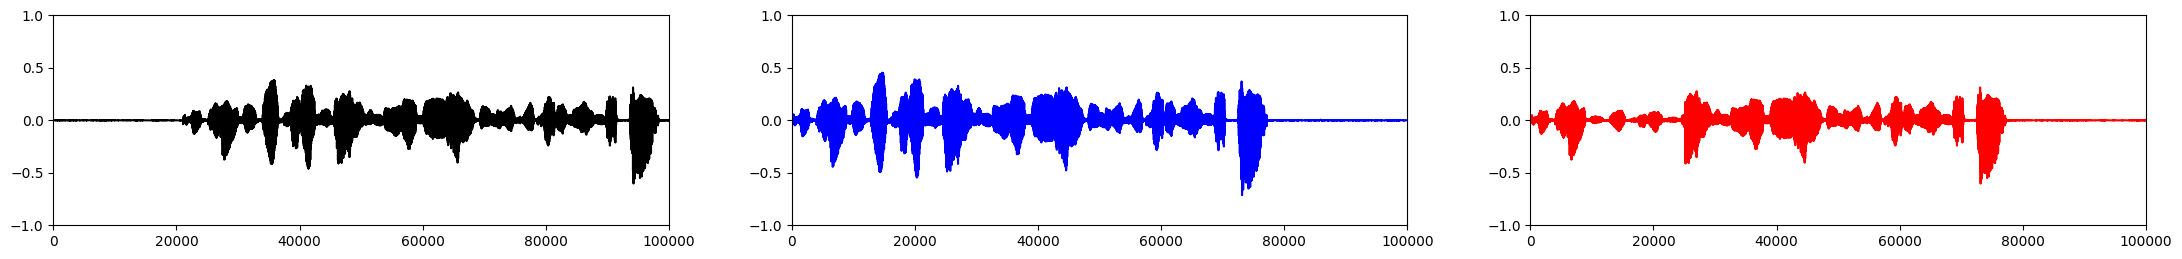

21 6.215226843461895


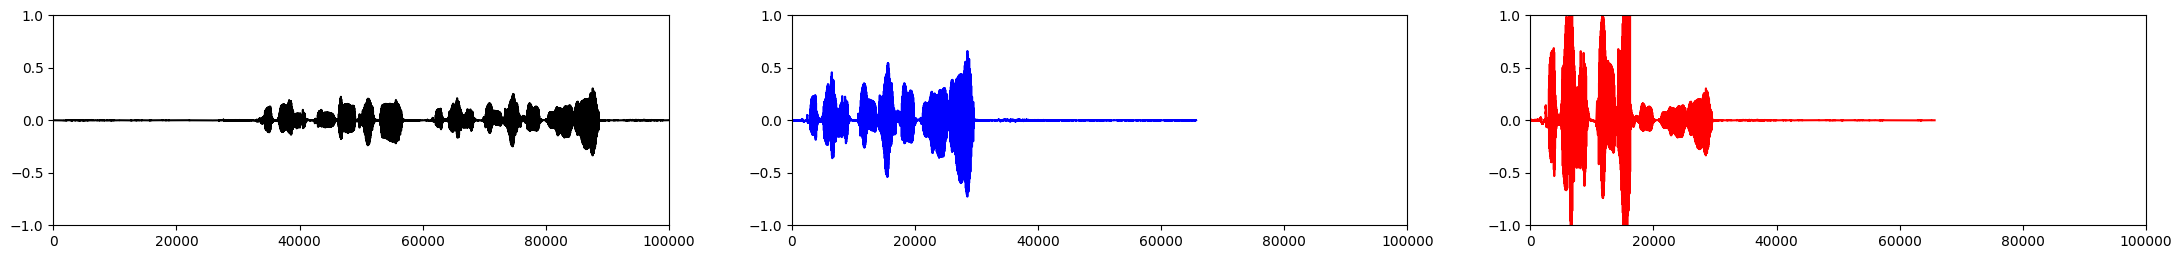

22 0.20333977191133112


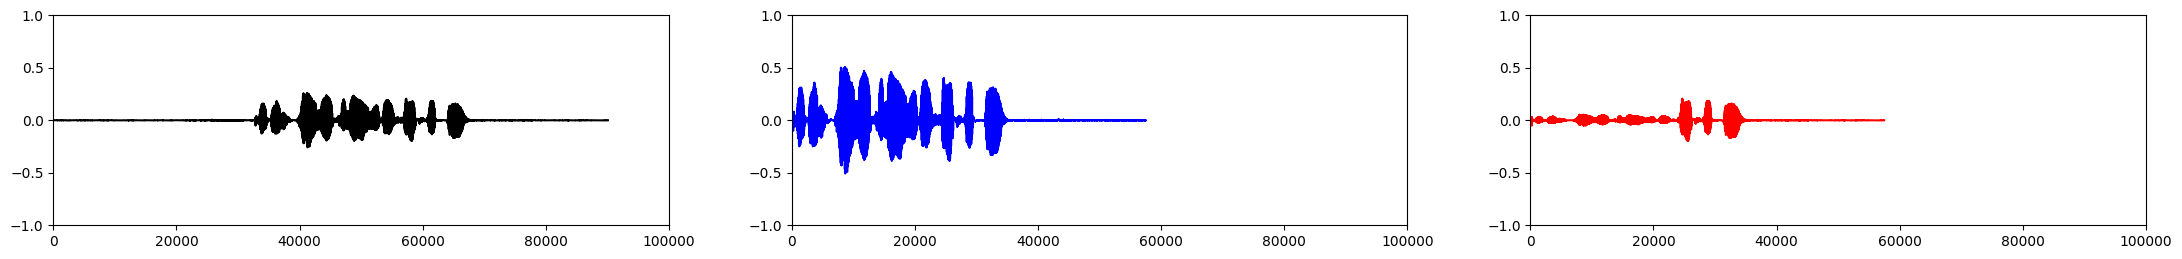

23 5.48163821337579


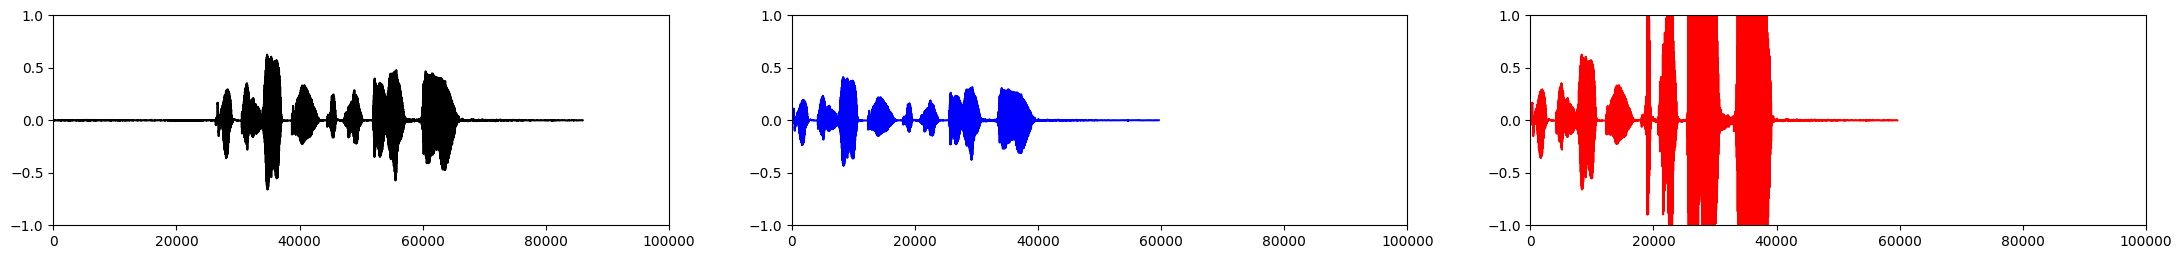

24 0.1924519870455588


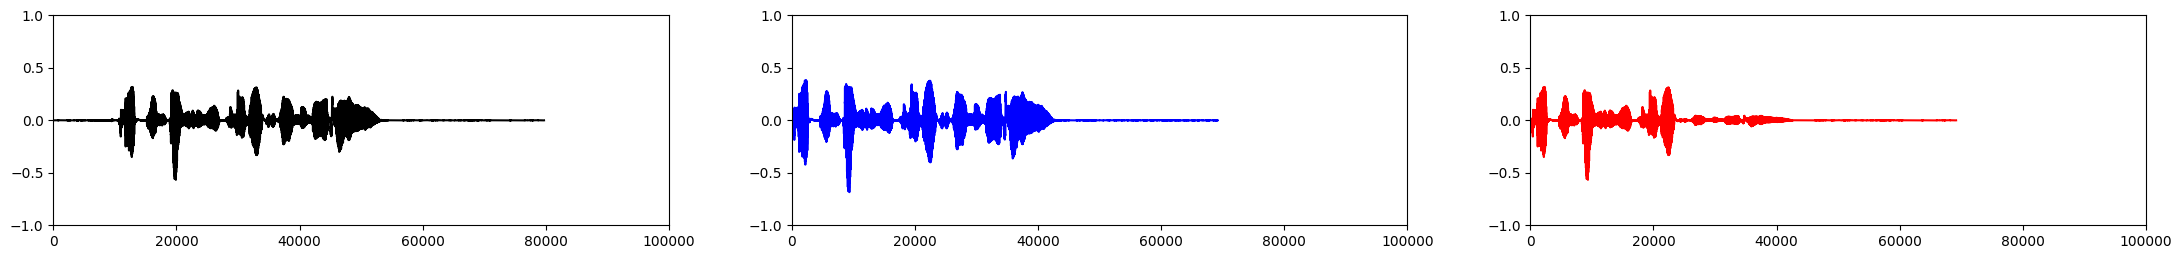

25 5.830489436205397


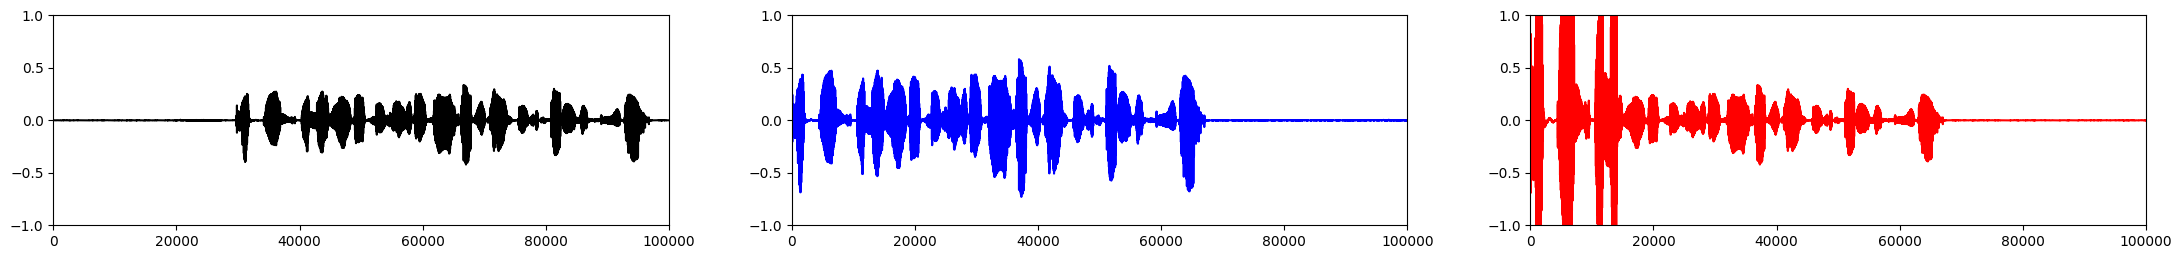

26 0.24429237659303105


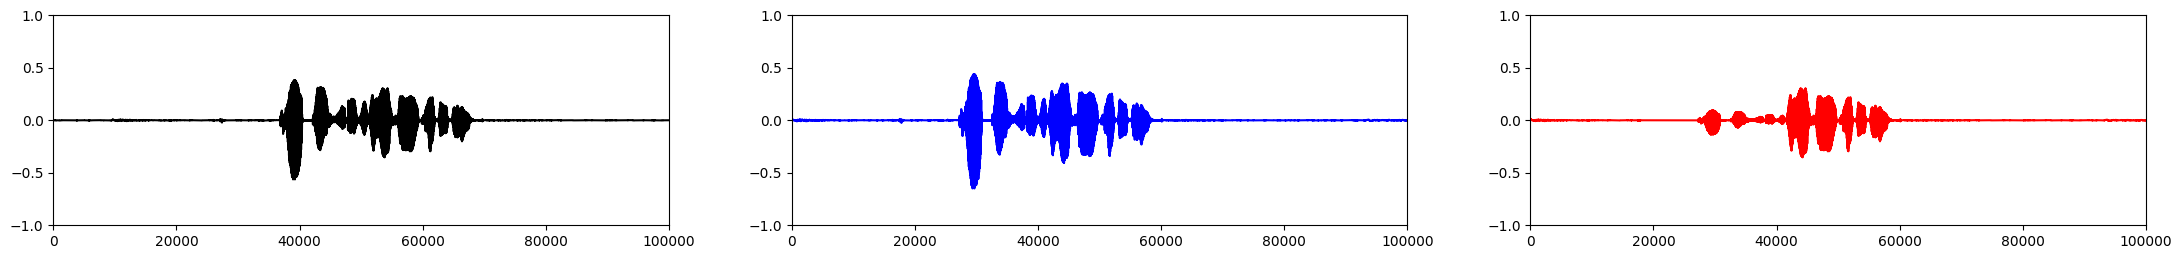

27 6.99057395541358


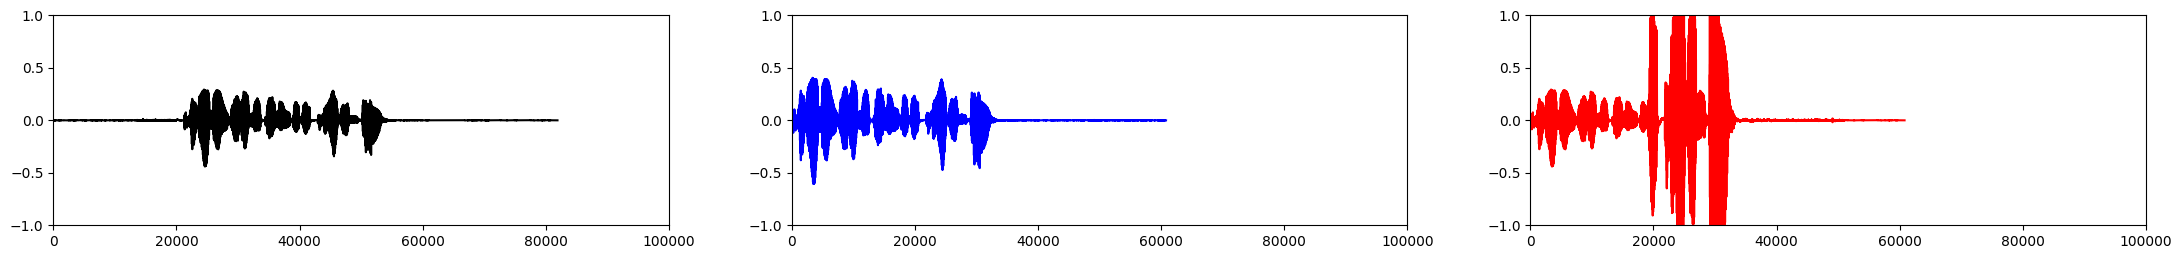

28 0.20827008064916475


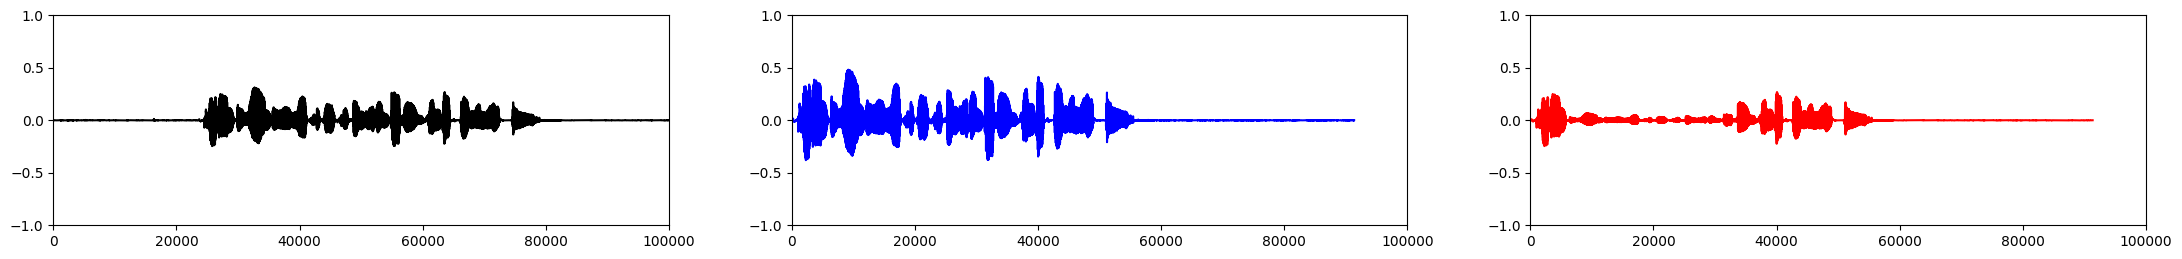

29 6.085706903957475


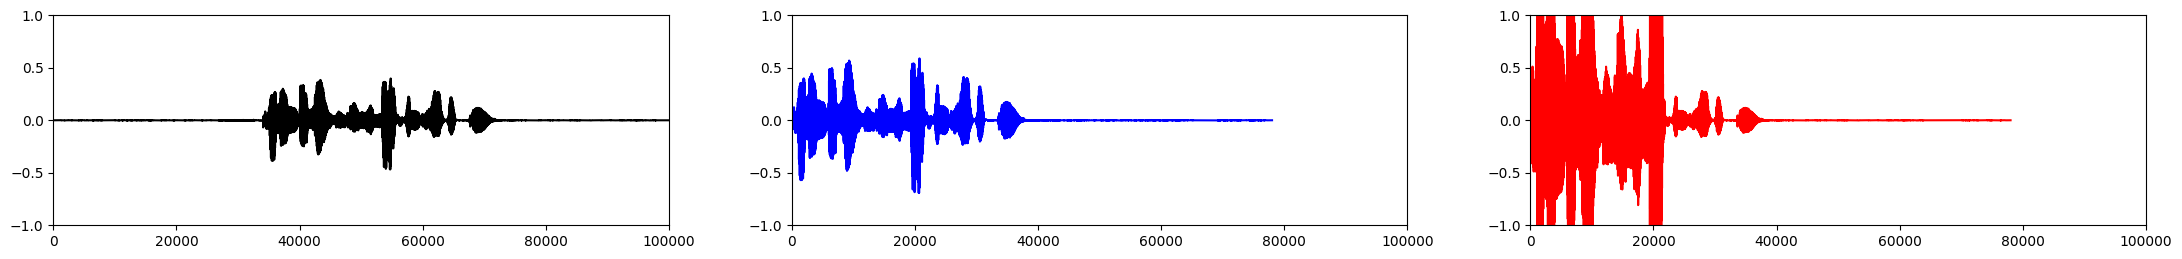

30 0.2096599247033254


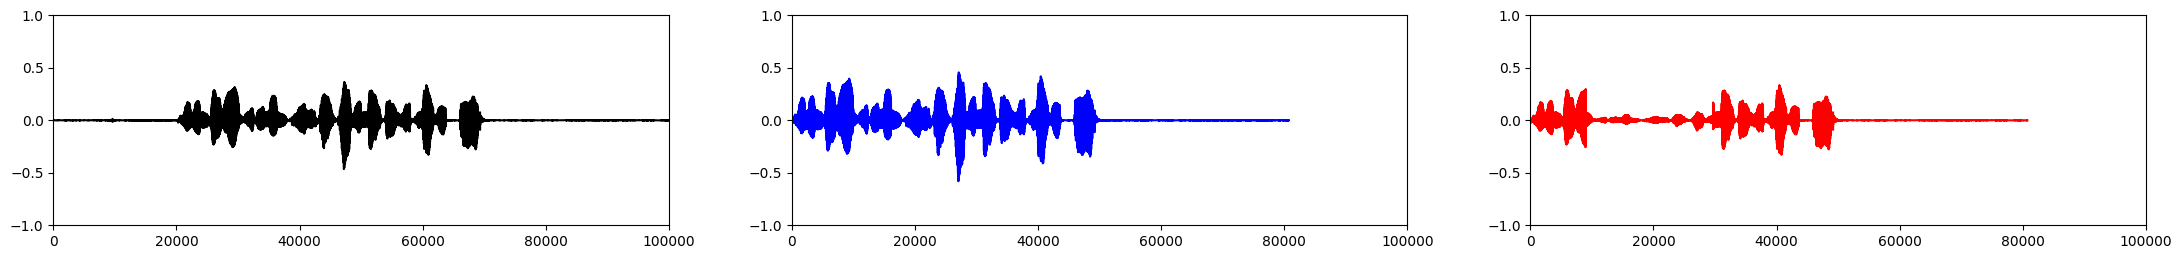

31 5.904934309035423


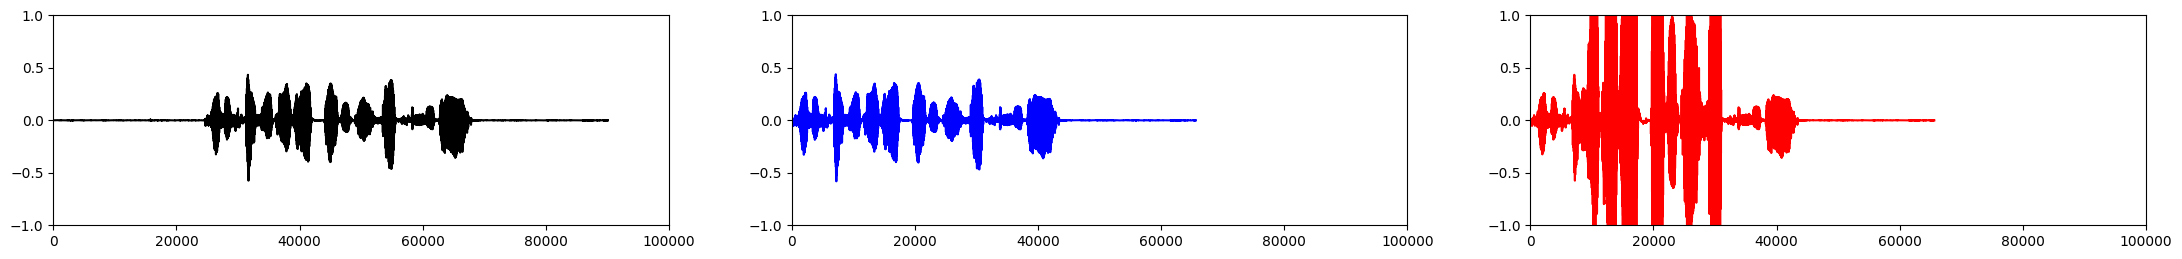

32 0.16520610093364205


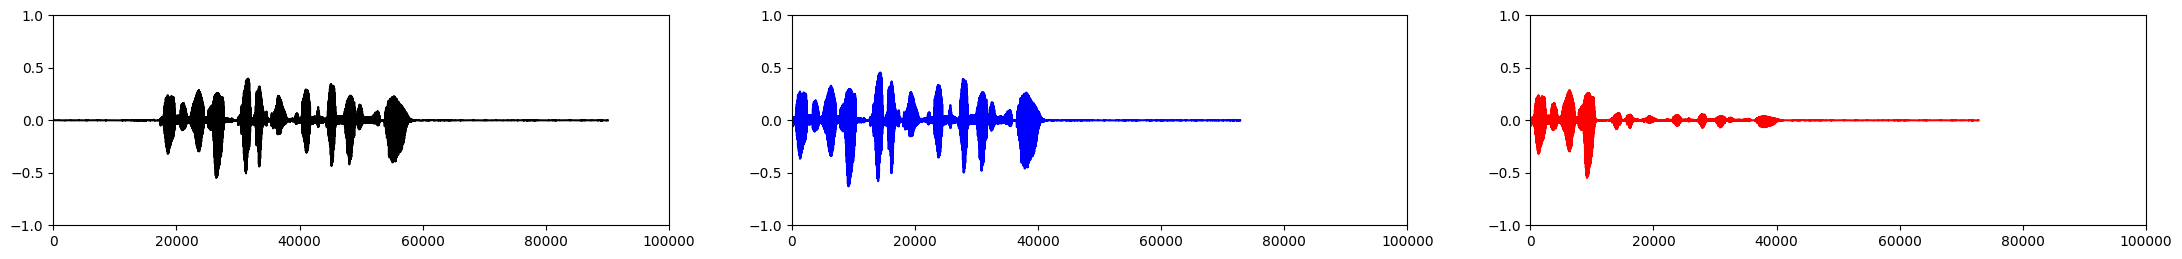

33 7.5946900726740765


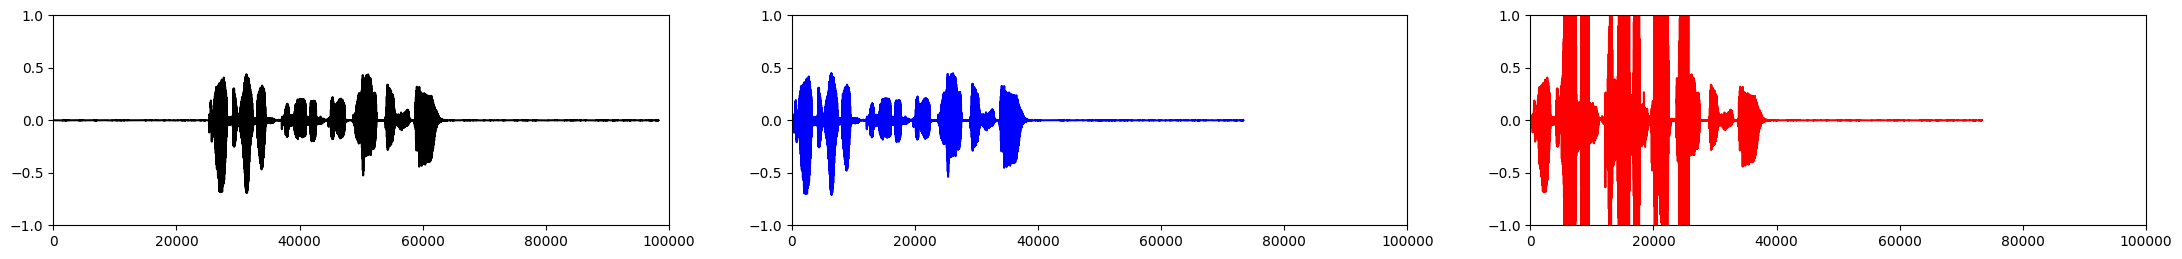

34 0.20617098973298384


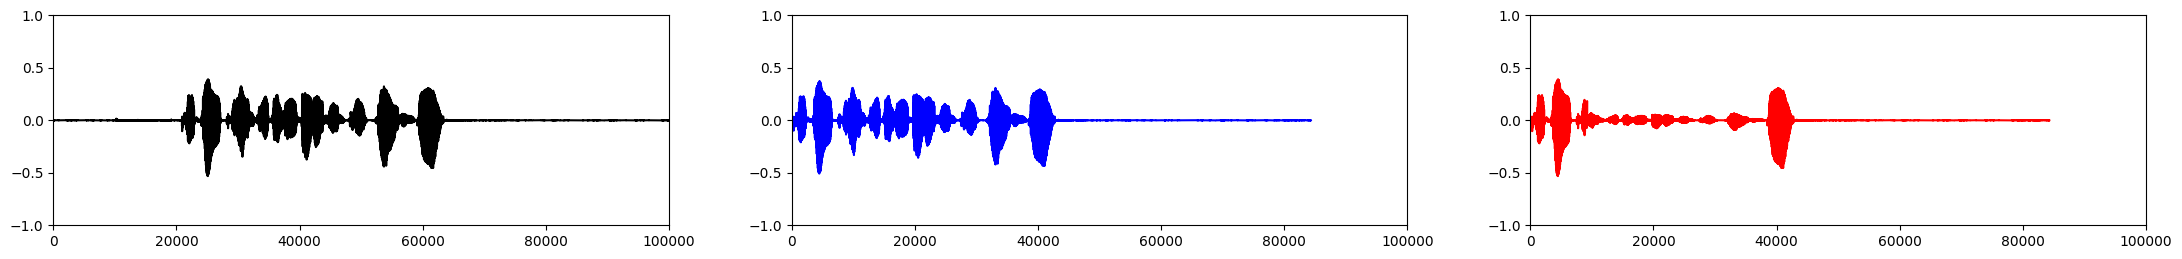

35 7.150296496912895


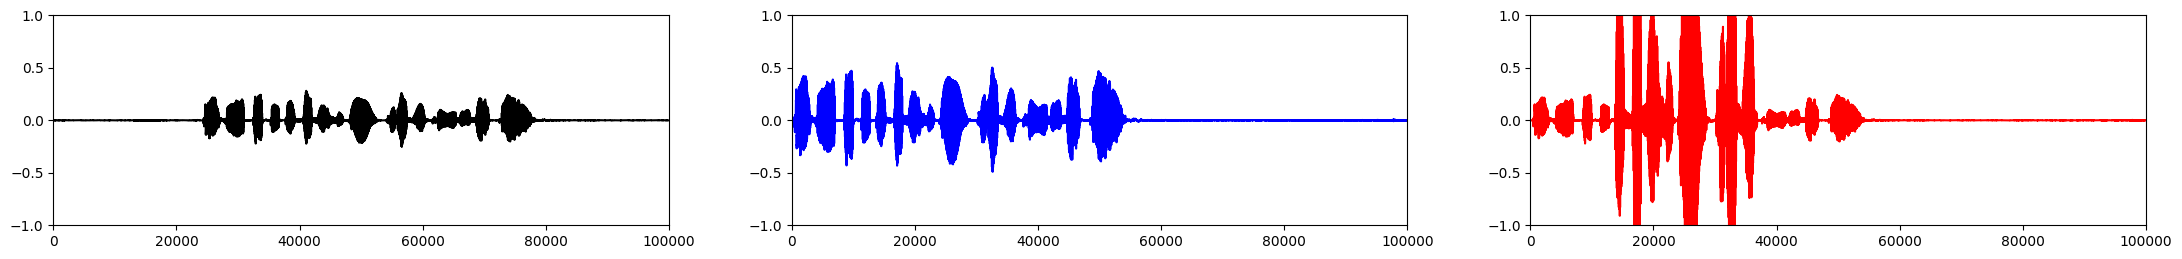

36 0.17652440502131977


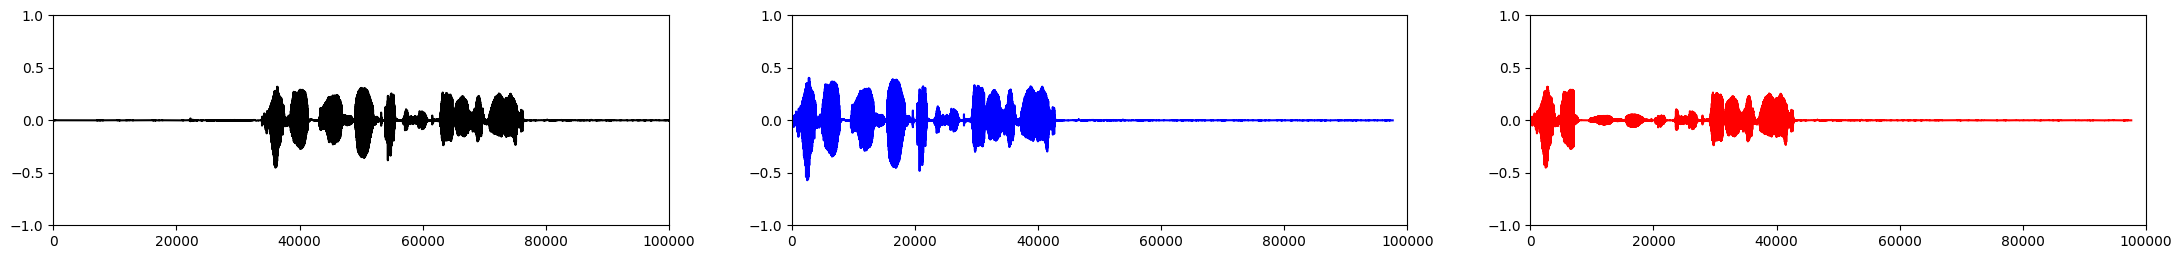

37 5.968756402803517


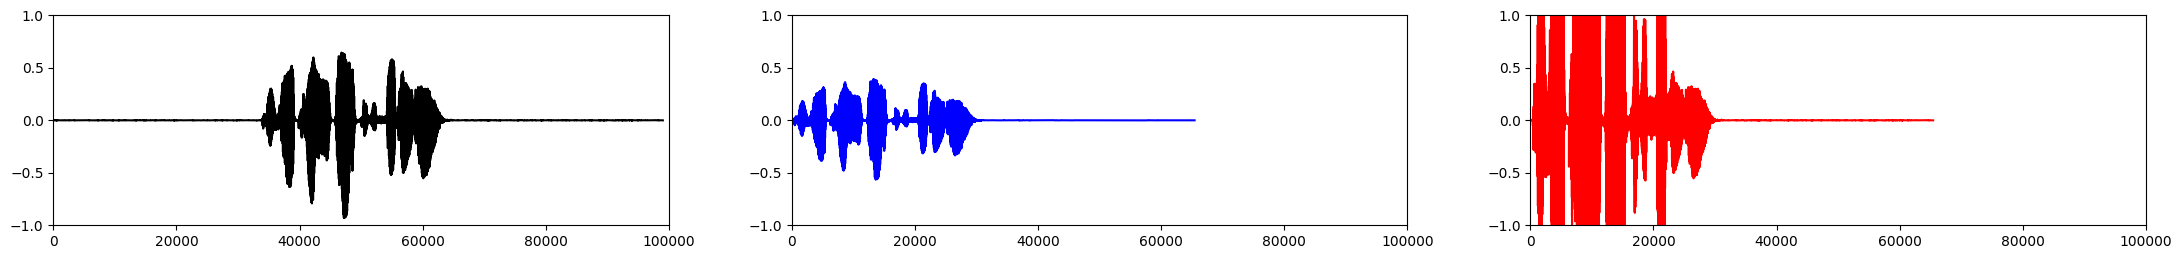

38 0.1281336040861567


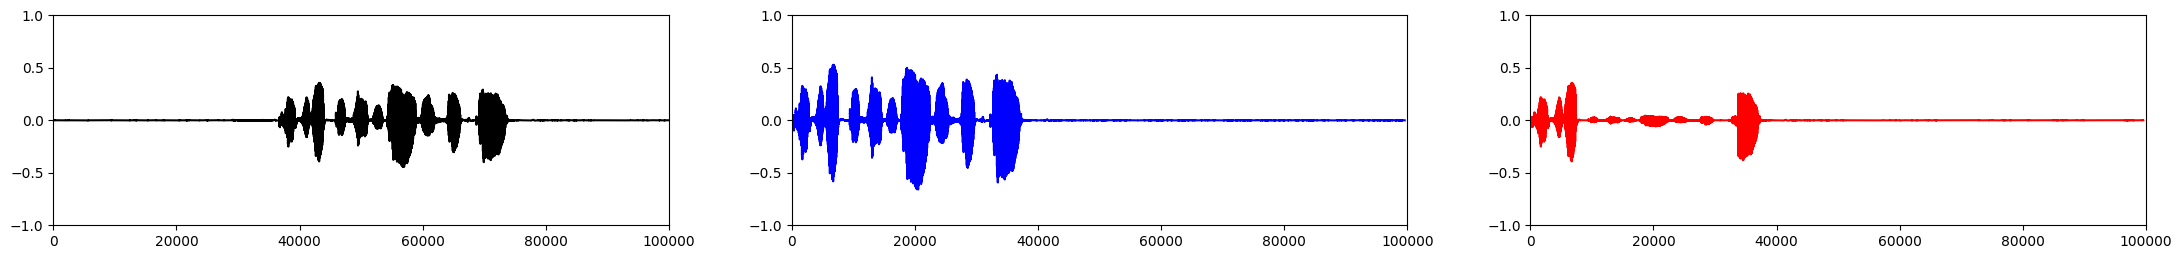

39 7.214592674067503


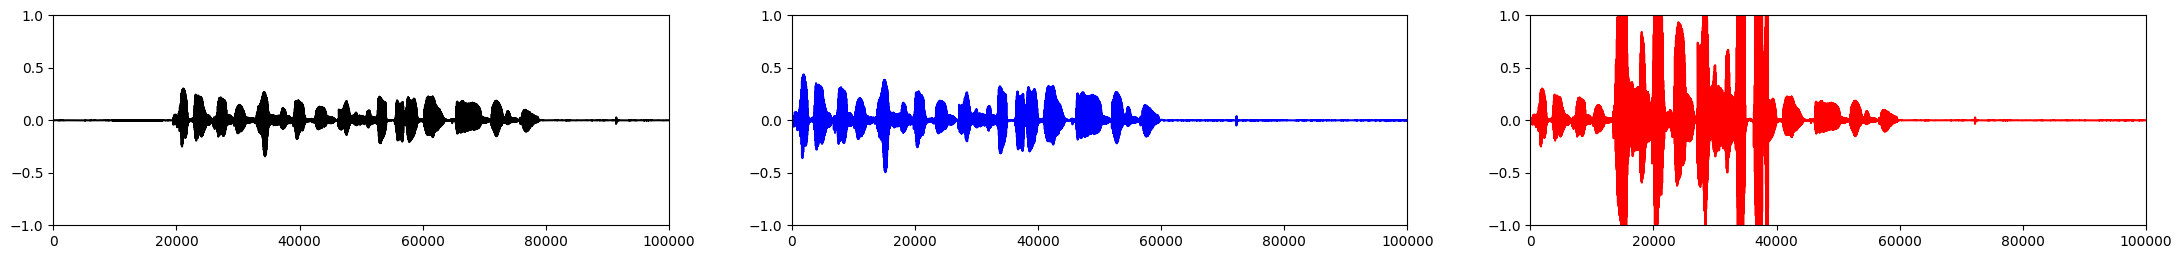

In [10]:
import matplotlib.pyplot as plt
import random
import soundfile as sf
import numpy as np
import shutil


import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

write = True

samples_by_speaker = 1 # <=30
test_samples = samples_by_speaker * 40

assert samples_by_speaker <= 30

for root, directories, files in os.walk('/home/yhjeon/projects/IITP_SE/NS_AGC/data/SITEC_AGC/test/distorted'):
    for file in files:
        os.remove(os.path.join(root,file))

for i in range(test_samples):
    if i % 100 == 0:
        print('processing test data {0}/{1}'.format(i, test_samples))
    wav_seq = []
    
    if write:
        filenum = i
    else:
        filenum = random.randint(0, test_samples - 1)
    wav, sr = sf.read('/home/yhjeon/data/SITEC/SITEC/{0:d}{1:03d}{2:03d}.wav'.format(filenum//(20*samples_by_speaker)+1, (filenum//samples_by_speaker)%20+1, filenum%samples_by_speaker+1))
    
    wav_seq = wav

    ####
    power_arr = np.array(np.split(wav_seq[0:48000], 100))
    power_arr = np.sqrt(np.mean(np.square(power_arr), axis=1))
    power = np.max(power_arr)
    ####
    original_wav_seq = wav_seq / (power * 5)

    for j in range(100):
        if power_arr[j] > 0.005:
            voice_start = 480 * j
            break



    distortion_start_time = int((1.5 + random.random() * 1.5) * 16000) 
    distortion_duration = int((1 + random.random() * 1) * 16000)
    distortion_gain = (4 * random.uniform(1, 2)) ** ((i % 2) * 2 - 1)
    distortion_mask = np.concatenate([np.array([1 for _ in range(distortion_start_time)]), np.array([distortion_gain for _ in range(distortion_duration)]), np.array([1 for _ in range(len(wav_seq) - distortion_duration - distortion_start_time)])])
    distorted_wav_seq = np.clip(wav_seq * distortion_mask, -1, 1)

    original_wav_seq = original_wav_seq[voice_start:]
    distorted_wav_seq = distorted_wav_seq[voice_start:]

    if i == 21:
        original_wav_seq = original_wav_seq[26000:]
        distorted_wav_seq = distorted_wav_seq[26000:]


    if write:
        sf.write('/home/yhjeon/projects/IITP_SE/NS_AGC/data/SITEC_AGC/test/original/original_{}.wav'.format(filenum), original_wav_seq, samplerate=16000)
    
    else:
        sf.write('/home/yhjeon/projects/IITP_SE/NS_AGC/data/SITEC_AGC/original_test.wav', original_wav_seq, samplerate=16000)

    if write:
        sf.write('/home/yhjeon/projects/IITP_SE/NS_AGC/data/SITEC_AGC/test/distorted/distorted_{0}_{1}_{2}_{3}.wav'.format(filenum, distortion_start_time, distortion_duration, distortion_gain), distorted_wav_seq, 16000)
    
    else:
        sf.write('/home/yhjeon/projects/IITP_SE/NS_AGC/data/SITEC_AGC/distorted_test.wav', distorted_wav_seq, 16000)


    if True:
        print(i, distortion_gain)
        plt.figure(figsize=[27, 6])
        plt.subplot(2, 3, 1)
        plt.axis([0, 100000, -1, 1])
        plt.plot(wav_seq, color='black')
        plt.subplot(2, 3, 2)
        plt.axis([0, 100000, -1, 1])
        plt.plot(original_wav_seq, color='blue')
        plt.subplot(2, 3, 3)
        plt.axis([0, 100000, -1, 1])
        plt.plot(distorted_wav_seq, color='red')
        #plt.subplot(2, 3, 4)
        #plt.axis([0, 1000, -0.1, 1.1])
        #plt.plot(vad_label, color='red')
        plt.show()
    
    if write == False:
        break
    